In [1]:
%pylab inline
from CoolProp.CoolProp import PropsSI

plt.rcParams['figure.figsize'] = (10,6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
atm_to_psia = 14.7        # psia / atm
atm_to_Pa = 101325.       # Pa / atm
psi_to_Pa = atm_to_Pa / atm_to_psia

# Conversion to go from RPM, gpm, feet to RPM, m^3/s, m
SI_to_US = (264.172 * 60)**0.5 / (3.28084)**0.75

### References
- [NASA SP-8109](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19740020848.pdf)
- [NASA SP-8121](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19780022641.pdf)
- [NASA SP-125 (Huzel and Huang)](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19710019929.pdf)
- [Centrifugal Pumps, Designs and Applications (Lobanoff)](https://catatanabimanyu.files.wordpress.com/2011/09/centrifugal_pumps_2e.pdf)
- [Rotating and Positive Displacement Pumps for Low-thrust Engines CR-72965](https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19740015230.pdf)
- [Centrifugal Pump Hydraulics for Low Specific Speed Applications](https://www.911metallurgist.com/blog/wp-content/uploads/2016/01/Centrifugal-Pumps-Hydraulics-for-Low-Speed-Applications.pdf)

### Staring from requirements

In [7]:
g0 = 9.80665         # m / sec^2
N = 50000.
psi = 0.65           # Head coefficient, see Lobanoff, Ross pg. 181
phi = 0.8            # velocity ratio throat to impeller, pg. 182
Ss = 7500.           # in US units of RPM, GPM, ft
Eta = 0.45

mdot = 1.0           #kg / s
rho_lox = PropsSI('D', 'P', 101325, 'Q', 0, 'Oxygen')
Q = mdot / rho_lox
dP = 850 * psi_to_Pa
Hreq = dP / rho_lox / g0
u2req = np.sqrt(g0 * Hreq / psi)

D2 = u2req / (pi * N / 60)
d1 = 2 * (Q / pi / phi)**0.5 * (psi / g0 / Hreq)**0.25

#d1 = 0.1 * .0254      # Outlet throad diameter, m
#D2 = 3. * .0254       # Impeller outer diameter, m
Ds = 10e-3             # shaft diameter, m
d2 = 0.298 * .0254     # Pump outlet diamter, m
b2 = 0.25 * .0254      # Impeller outer height, m
alpha = 15.            # deg
theta = 30.            # deg

omega = N / 60. * 2. * pi
u2 = omega * D2 / 2.
H = psi * u2**2 / g0
Q = phi * u2 * pi * d1**2 / 4.

Ns0 = 4847. * phi**0.5 * d1 / psi**0.75 / D2
Ns = N * Q**0.5 / H**0.75
Ss_si = Ss / SI_to_US
NPSHR = H * (Ns / Ss_si)**1.333
NPSPR = NPSHR * rho_lox * g0
De = 5.1 * (Q * 264.172 * 60 / N)**0.33 * .0254
Ve = Q / (pi * De**2 / 4)
V1 = Q / (pi * d1**2 / 4)
V2 = Q / (pi * d2**2 / 4)
ue = omega * De / 2.
Pe = ue**2 * rho_lox / g0
h1 = d1 * (D2 / De)

W_isen = dP * Q

print('Mdot: %.3f kg/s' % (Q*rho_lox))
print('Head rise: %.1f m' % H)
print('Isentropic work (est. real power): %.1f kW (%.1f kW)' % (W_isen/1e3, W_isen/Eta/1e3))
print('Specific speed : %.1f (%.4f SI)' % (Ns * SI_to_US, Ns / 60))
print('NPSHR: %.1f m' % NPSHR)
print('Suction pressure required: %.1f psi' % (NPSPR / psi_to_Pa))
print('Eye inlet diameter: %.3f in' % (De / .0254))
print('Eye inlet velocity: %.1f m/s' % Ve)
print('Rotor diameter: %.3f in' % (D2 / .0254))
print('Blade inner height: %.3f in' % (h1 / .0254))
print('Throat diameter: %.3f in ' % (d1 / .0254))
print('Throat velocity: %.1f m/s' % V1)
print('Outlet velocity: %.1f m/s' % V2)
print('Eye tangential velocity: %.1f m/s' % ue)
print('Shaft seal surfaces speed: %.1f m/s' % (Ds * omega / 2))
print('Seal dynamic pressure ~ %.1f psia' % (Pe / psi_to_Pa))

Mdot: 1.000 kg/s
Head rise: 523.5 m
Isentropic work (est. real power): 5.1 kW (11.4 kW)
Specific speed : 698.4 (0.2254 SI)
NPSHR: 22.1 m
Suction pressure required: 35.9 psi
Eye inlet diameter: 0.342 in
Eye inlet velocity: 14.8 m/s
Rotor diameter: 1.337 in
Blade inner height: 0.610 in
Throat diameter: 0.156 in 
Throat velocity: 71.1 m/s
Outlet velocity: 19.5 m/s
Eye tangential velocity: 22.7 m/s
Shaft seal surfaces speed: 26.2 m/s
Seal dynamic pressure ~ 8.7 psia


In [60]:
# Off-nominal flowrate

mdot2 = 0.8 #kg /sec
N2 = 40000.
Q2 = mdot2 / rho_lox
H2 = (N2 * Q2**0.5 / Ns)**(1./0.75)
dP2 = rho_lox * H2 * g0
print dP2 / psi_to_Pa
print dP2 * Q / Eta / 1e3

511.9999999999997
6.872354769235231


### CFD Results

The first design was using the following parameters:

> Mdot: 1.000 kg/s  
> Head rise: 431.1 m  
> Isentropic work (est. real power): 4.2 kW (10.6 kW)  
> Specific speed : 646.3 (0.2086 SI)  
> NPSHR: 16.4 m  
> Suction pressure required: 26.7 psi  
> Eye inlet diameter: 0.368 in  
> Eye inlet velocity: 12.8 m/s  
> Rotor diameter: 1.461 in  
> Blade inner height: 0.519 in  
> Throat diameter: 0.131 in  
> Throat velocity: 101.0 m/s  
> Outlet velocity: 31.6 m/s  
> Eye tangential velocity: 19.6 m/s  
> Shaft seal surfaces speed: 20.9 m/s  
> Seal dynamic pressure ~ 6.5 psia  

The design calculations assumed $\phi = 1.3$ which I realized after running CFD is meant in Lobanoff to be the value at cutoff, not at design point (pg. 182).  At design point, it should be in the vicinity of 0.8 and this explains why the best efficiency point for this first pump design was at substantially lower $Q$ than design.  I also ran the design equations at 40,000 RPM and the CFD at 50,000 so the head predicted by CFD is higher than design point.  This is expected.  The mesh, CAD and a cross section through volute and diffuser for this initial design are shown below:

<img src="barske_v1_mesh.png"><img src="barske_v1_cad.png"><img src="barske_v1_section.png">

Note the step between the volute section and the diffuser throat - a feature I also want to improve in the next iteration.

All of the CFD analysis was performed with the simpleFoam solver (steady-state, incompressible, RANS solver of OpenFOAM package) with a moving reference frame (MRF) for the impeller.  The k-$\omega$ turbulence closure model was used.  In all cases water density (997 kg/$m^3$) was used.  The cases below are representative of the 0.8 kg/sec (water) flowrate.

<img src="Pressure.png">

<img src="Velocity.png">

Als for reference iso-volumes of low-pressure showing where cavitation is likely to start:

<img src="Incipient Cavitation.png">

And iso-volumes of high fluid velocity:

<img src="High Velocity.png">

At the higher flowrate of 1 kg/sec clear separation in defuser can be seen and the calculated pump efficiency dropped precipitously.

Pump curve for this conviguration:

Text(0,0.5,'$\\psi$')

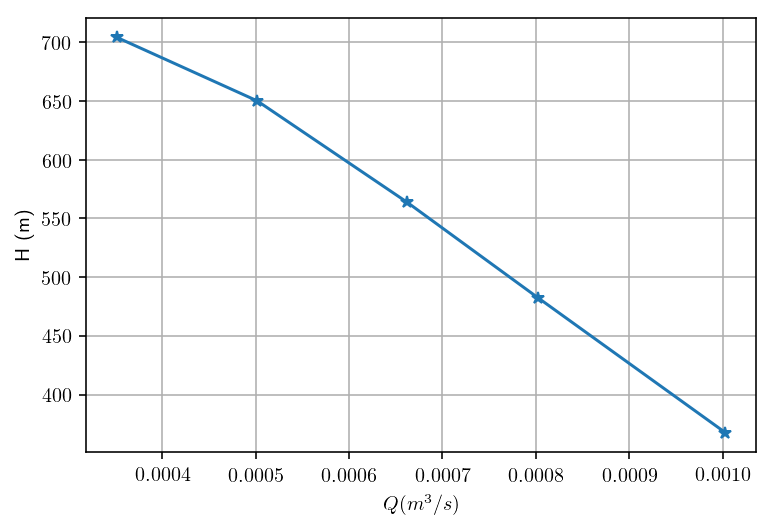

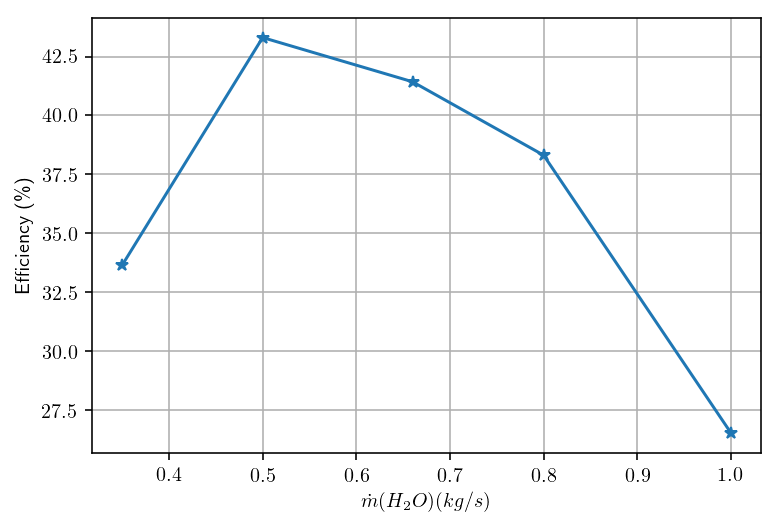

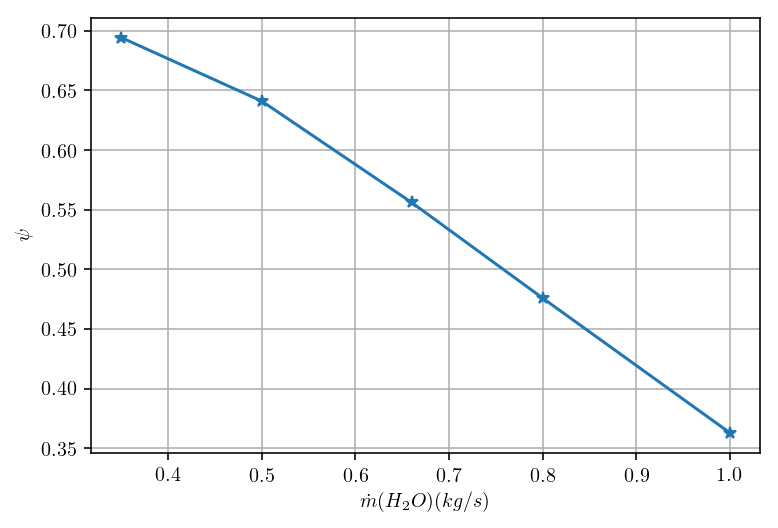

In [72]:
g0 = 9.81                                            # m/s^2
rho = 997.                                           # kg/m^3
D2 = 1.5 * .0254                                     # m
N = 50000.                                           # RPM
omega = N * 2 * pi / 60.                             # rad / sec
mdot_h2o = np.array([0.35, 0.5, 0.66, 0.8, 1.0])          # kg/sec
Q = mdot_h2o / rho                                   # m^3 / s
Pt = np.array([6.885e6, 6.357e6, 5.515e6, 4.720e6, 3.6e6])  # Pa
T = np.array([1.372, 1.406, 1.683, 1.888, 2.6])           # N-m

H = Pt / g0 / rho
Eff = Q * Pt / T / omega
psi = g0 * H / (omega * D2 / 2)**2

plt.figure()
plt.plot(Q, H, '*-')
plt.xlabel(r'$Q (m^3 / s)$')
plt.ylabel('H (m)')

plt.figure()
plt.plot(mdot_h2o, Eff * 100., '*-')
plt.xlabel(r'$\dot{m}(H_2 O) (kg / s)$')
plt.ylabel('Efficiency (\%)')

plt.figure()
plt.plot(mdot_h2o, psi, '*-')
plt.xlabel(r'$\dot{m}(H_2 O) (kg / s)$')
plt.ylabel(r'$\psi$')

### Configuration 2

Changed some parameters (namely $\phi=0.8$ now) based on first CFD runs and now design point is:

> Mdot: 1.000 kg/s  
> Head rise: 431.1 m  
> Isentropic work (est. real power): 4.2 kW (10.6 kW)  
> Specific speed : 646.3 (0.2086 SI)  
> NPSHR: 16.4 m  
> Suction pressure required: 26.7 psi  
> Eye inlet diameter: 0.368 in  
> Eye inlet velocity: 12.8 m/s  
> Rotor diameter: 1.461 in  
> Blade inner height: 0.662 in  
> Throat diameter: 0.167 in   
> Throat velocity: 62.2 m/s  
> Outlet velocity: 19.5 m/s  
> Eye tangential velocity: 19.6 m/s  
> Shaft seal surfaces speed: 20.9 m/s  
> Seal dynamic pressure ~ 6.5 psia  


Text(0,0.5,'$\\psi$')

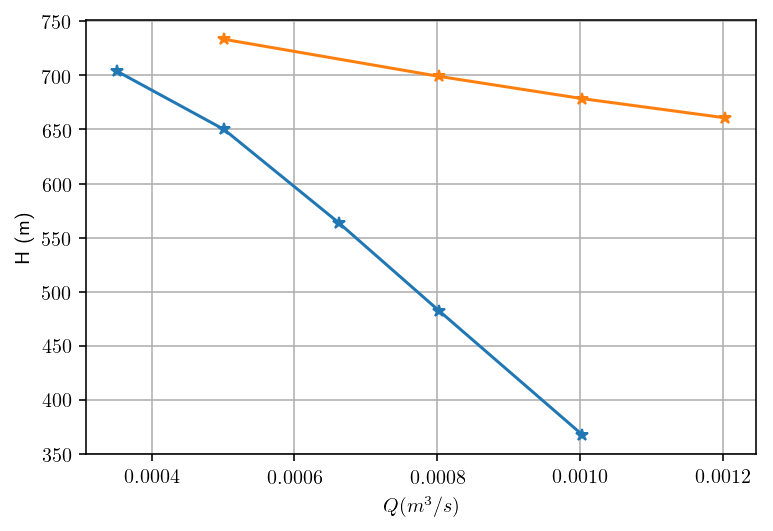

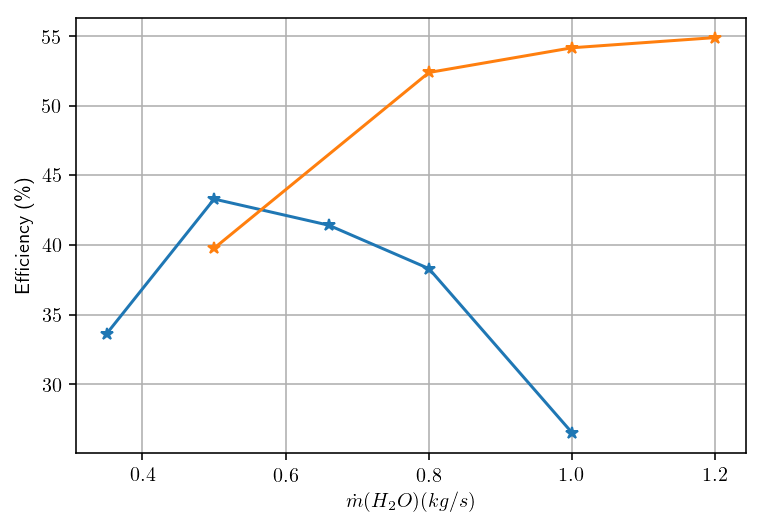

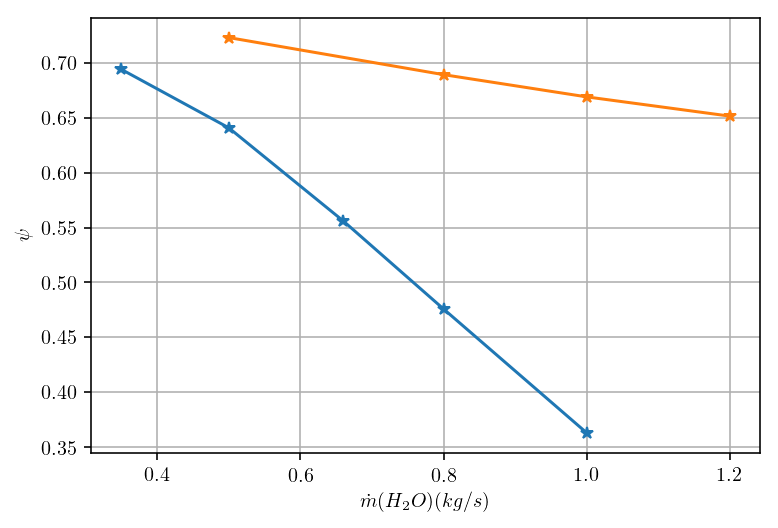

In [73]:
N = 50000.                                           # RPM
D2 = 1.5 * .0254                                     # m
omega = N * 2 * pi / 60.                             # rad / sec
mdot_h2o_2 = np.array([0.5, 0.8, 1.0, 1.2])            # kg/sec
Q_2 = mdot_h2o_2 / rho                                   # m^3 / s
Pt_2 = np.array([7.172e6, 6.837e6, 6.636e6, 6.462e6])  # Pa
T_2 = np.array([1.727, 2.00, 2.347, 2.706])            # N-m

H_2 = Pt_2 / g0 / rho
Eff_2 = Q_2 * Pt_2 / T_2 / omega
psi_2 = g0 * H_2 / (omega * D2 / 2)**2

plt.figure()
plt.plot(Q, H, '*-', label='v1')
plt.plot(Q_2, H_2, '*-', label='v2')
plt.xlabel(r'$Q (m^3 / s)$')
plt.ylabel('H (m)')

plt.figure()
plt.plot(mdot_h2o, Eff * 100., '*-', label='v1')
plt.plot(mdot_h2o_2, Eff_2 * 100., '*-', label='v2')
plt.xlabel(r'$\dot{m}(H_2 O) (kg / s)$')
plt.ylabel('Efficiency (\%)')

plt.figure()
plt.plot(mdot_h2o, psi, '*-', label='v1')
plt.plot(mdot_h2o_2, psi_2, '*-', label='v2')
plt.xlabel(r'$\dot{m}(H_2 O) (kg / s)$')
plt.ylabel(r'$\psi$')

### Configuration 3

We clearly overshot on configuration two due to the original design being for 40,000 RPM although we are running analysis at 50,000 RPM.  This time we will target 1 kg/sec (LOX) at 800 psi.  

If we run the pump at 40,000 RPM, we should still develop about $\left(\frac{40,000}{50,000}\right)^2(800 \text{psi}) = 512 \text{psi}$ head pressure at 0.8 kg/sec (LOX).

And assuming we can achieve 45% efficiency in the real pump, this means we will need 10.7kW shaft power at 50,000 RPM and 6.8 kW at 40,000, both within the capability of several of the motors.  Here is the design poin:

> Mdot: 1.000 kg/s  
> Head rise: 492.7 m  
> Isentropic work (est. real power): 4.8 kW (10.7 kW)  
> Specific speed : 730.9 (0.2359 SI)  
> NPSHR: 22.1 m  
> Suction pressure required: 35.9 psi  
> Eye inlet diameter: 0.342 in  
> Eye inlet velocity: 14.8 m/s  
> Rotor diameter: 1.350 in  
> Blade inner height: 0.612 in  
> Throat diameter: 0.155 in  
> Throat velocity: 71.8 m/s  
> Outlet velocity: 19.5 m/s  
> Eye tangential velocity: 22.7 m/s  
> Shaft seal surfaces speed: 26.2 m/s  
> Seal dynamic pressure ~ 8.7 psia  



Text(0,0.5,'$\\psi$')

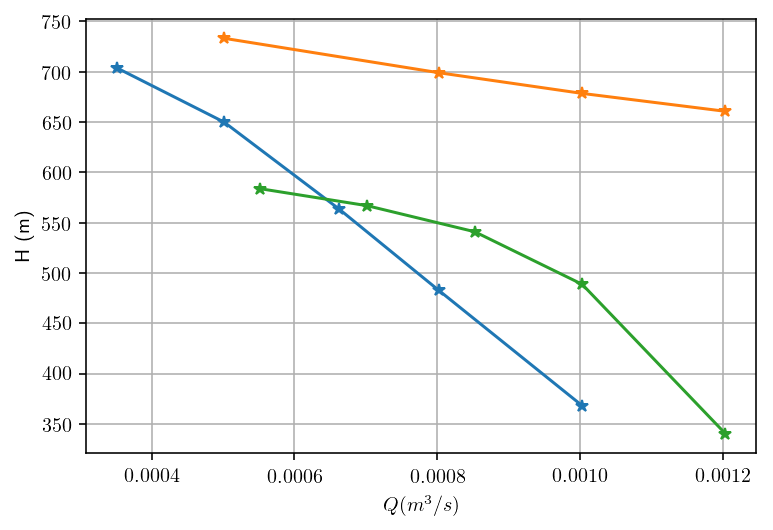

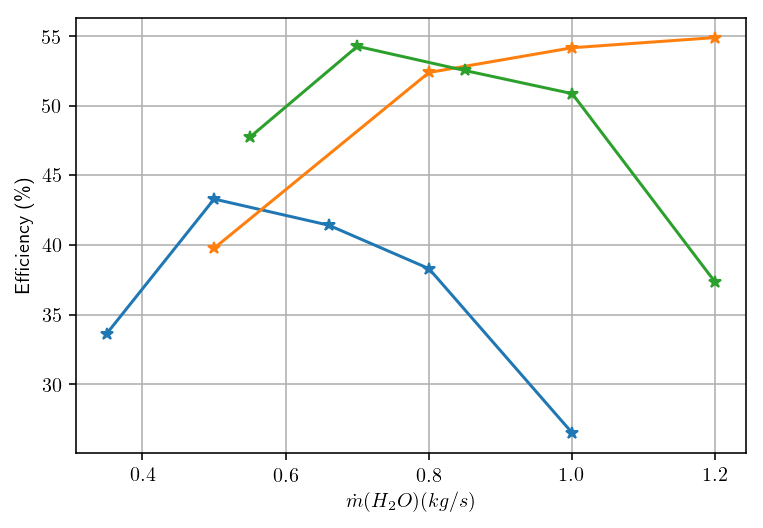

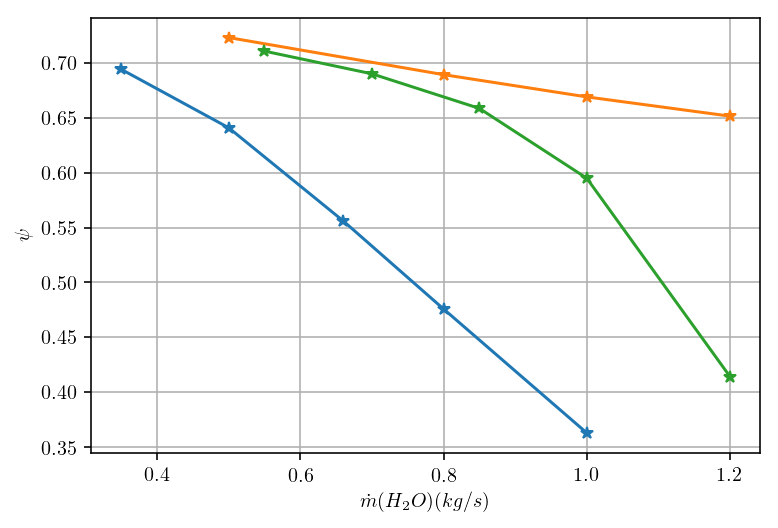

In [85]:
### Configuration 3
N = 50000.                                           # RPM
D2 = 1.35 * .0254                                    # m
omega = N * 2 * pi / 60.                             # rad / sec
mdot_h2o_3 = np.array([0.55, 0.70, 0.85, 1.0, 1.2])  # kg/sec
Q_3 = mdot_h2o_3 / rho                               # m^3 / s
Pt_3 = np.array([5.710e6, 5.544e6, 5.291e6, 4.78e6, 3.328e6]) # Pa, 3.921e6 (hi rez)
T_3 = np.array([1.26, 1.37, 1.64, 1.8, 2.05])              # N-m, 2.07 (hi rez)

H_3 = Pt_3 / g0 / rho
Eff_3 = Q_3 * Pt_3 / T_3 / omega
psi_3 = g0 * H_3 / (omega * D2 / 2)**2

plt.figure()
plt.plot(Q, H, '*-', label='v1')
plt.plot(Q_2, H_2, '*-', label='v2')
plt.plot(Q_3, H_3, '*-', label='v3')
plt.xlabel(r'$Q (m^3 / s)$')
plt.ylabel('H (m)')

plt.figure()
plt.plot(mdot_h2o, Eff * 100., '*-', label='v1')
plt.plot(mdot_h2o_2, Eff_2 * 100., '*-', label='v2')
plt.plot(mdot_h2o_3, Eff_3 * 100., '*-', label='v3')
plt.xlabel(r'$\dot{m}(H_2 O) (kg / s)$')
plt.ylabel('Efficiency (\%)')

plt.figure()
plt.plot(mdot_h2o, psi, '*-', label='v1')
plt.plot(mdot_h2o_2, psi_2, '*-', label='v2')
plt.plot(mdot_h2o_3, psi_3, '*-', label='v3')
plt.xlabel(r'$\dot{m}(H_2 O) (kg / s)$')
plt.ylabel(r'$\psi$')

### Seal Options
The Lehner 3040 motor has a 10mm shaft.

- [John Crane Type 2100](https://www.johncrane.com/~/media/J/Johncrane_com/Files/Products/Technical%20Specification/Seals/TD-2100-8PG-BW-OCT2015.pdf) - very basic carbon mechanical (face) seal.  Available in 10mm shaft size.  Not rated for low temperature, high speed or oxygen service
- [John Crane Type 285](https://www.johncrane.com/~/media/J/Johncrane_com/Files/Products/Technical%20Specification/Seals/TD-285-4PG-BW-OCT2015.pdf) - Specified for LOX service.  Pressure and speed quite a bit lower than desired (100 psig & 10,000 RPM).  Not clear what shaft sizes available
- [John Crane Type 59U](https://www.johncrane.com/~/media/J/Johncrane_com/Files/Products/Technical%20Specification/Seals/TD-59U-59B-8PG-BW-OCT2015.pdf) - PTFE wedge should be compatible with LOX.  Only goes down to 14mm in catalog, would need to contact to see if they could do 10mm
- [Daybreak Seals](https://www.daybreakworld.com/multispring-mechanical-seals.php) has some interesting options that mention Cryogenic operation and go down to 10mm
- [Parker Catalog](https://www.parker.com/literature/Engineered%20Polymer%20Systems/5350.pdf) - looks like FlexiCase are the right product.  Part number M(metric)-0102(modified PTFE)-CMN(single machined lip)-0600(0.25in gland xsection)-01000(10mm shaft)-060(6mm width)-V(FKM flourocarbon gasket)-A(aluminum): [M-0102-CMN-0600-01000-060-V-A](http://ph.parker.com/us/17061/en/high-speed-low-torque-metal-case-ptfe-lip-rotary-shaft-seal-flexicase-cmn-cme)
- [GARLOCK Seal](https://www.garlock.com/sites/default/files/documents/en/Garlock_Shaft_Seals_PS-SEAL_Catalog_NB32415_EN-EU_LR.pdf)